In [3]:
import scipy.fft as fft
import numpy as np
import matplotlib.pyplot as plt

## Check and play with different dependency parameters like total time duration of the signal, sampling rate and noise strength

Let's generate the data first

In [4]:
t=np.arange(0,1000,0.01)

In [5]:
y = np.sin(2*np.pi*1.23*t) + 2*np.sin(2*np.pi*1.35*t) + 1.5*np.cos(2*np.pi*1.15*t) + 10*np.random.uniform(-4,4, len(t))

Text(0, 0.5, 'y')

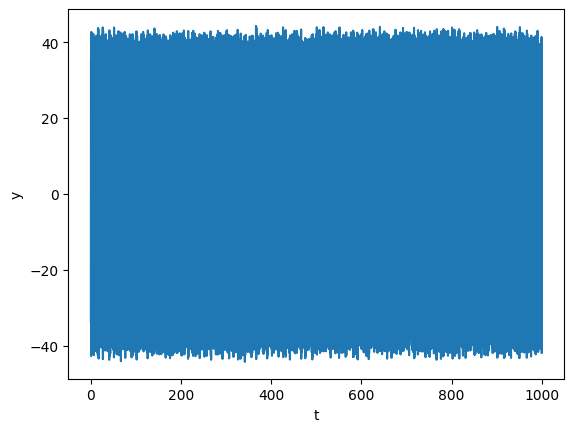

In [6]:
plt.plot(t,y)
plt.xlabel("t")
plt.ylabel("y")

## Taking the fourier transform of the data

In [7]:
Y= fft.fft(y)
length=len(y)
timestep=t[1]-t[0]

## Generating the points of the independent variable frequency

In [9]:
freq = fft.fftfreq(n=length, d=timestep)
print(len(t), len(y))
print(len(freq), len(Y))

100000 100000
100000 100000


(0.0, 2.0)

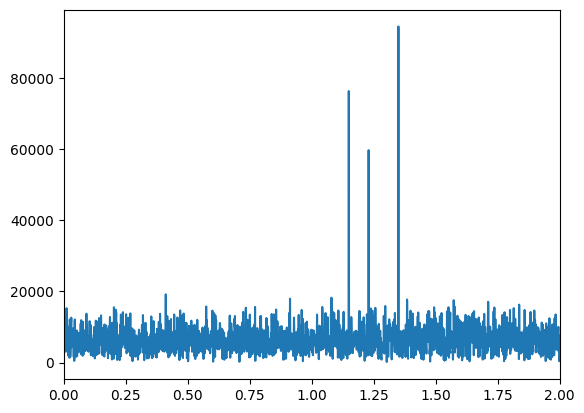

In [10]:
plt.plot(freq[:int(length/2)], abs(Y[:int(length/2)]))
plt.xlim(0,2)
#plt.semilogy()

## Taking the inverse Fourier transform

In [30]:
yt= fft.ifft(Y)
#plt.plot(abs(yt-y))
#plt.semilogy()

## Preparing the timestamps 

In [31]:
df=freq[1]-freq[0]
T=1/df
print(T)

1000.0


In [32]:
f_range= freq[0]-freq[int(len(freq)/2)]
dt= 1/(2*f_range)
print(dt)

0.01


In [33]:
time=np.arange(0,T, dt)

(10.0, 20.0)

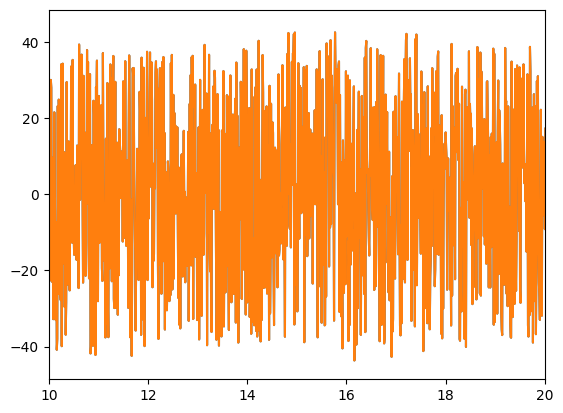

In [34]:
plt.plot(time, y)
plt.plot(t,y)
plt.xlim(10,20)
#plt.semilogy()

## Plotting the residual

In [11]:
plt.plot(time, y-yt)

NameError: name 'time' is not defined

(0.0, 2.0)

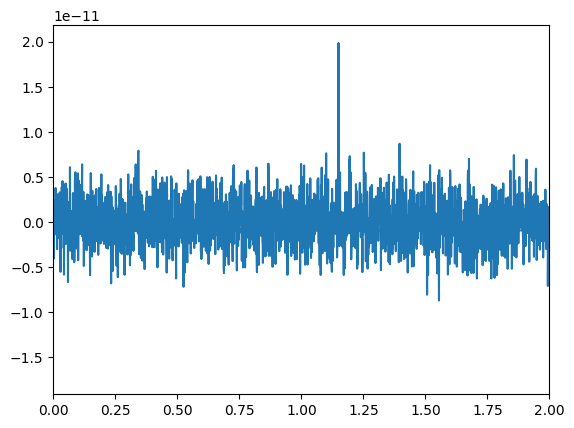

In [38]:
error_f = fft.fft(yt-y)
error_freq = fft.fftfreq(n=len(yt), d=timestep)
plt.plot(error_freq, error_f)
plt.xlim(0,2)

## Summary of what we've learnt:
1. The time duration of the data piece, gives us the resolution of the frequency domain point spacing
2. The time separation between two data points (i.e. the inverse of the sampling rate) gives us the max frequency that can be sampled.
3. Bandwidth of the signal = 1/2 times the sampling rate 